\\(\theta\\) is the threshold for activation

$$
z = - \theta + w'x
$$

Activation function (in this case a unit step function, aka Heaviside step function). Squash real line into binary (-1, 1)

$$
\phi(z) = \begin{cases}
1 if z \geq 0 \\
-1 otherwise
\end{cases}
$$

Update:
1. Initialize weights to 0 or small number
2. For each training sample \\(x^{(i)}\\) perform
  1. Compute output value \\(\hat y\\)
  2. Update the weights \\(w_j := w_j + \eta (y^{(i)} - \hat y^{(i)})x^{(i)}_j \\)

Question: Is \\(\theta\\) fixed or also updated? When it's folded into one of the weight, it's updated too, but that doesn't quite make sense. Why's the threshold being updated?

In [7]:
import numpy as np

class Perceptron(object):
    """
    Perceptron
    
    learning_rate : float
        Learning rate (between 0 and 1)
    n_iter : float
        Number of passes over the training set
        
    Attributes
    ----------
    w_ : 1d-array
        Weights
    errors_ : list
        Number of misclassifications in every epoch
    """
    
    def __init__(self, learning_rate, threshold, n_iter):
        self.learning_rate = learning_rate
        self.threshold = threshold
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """
        Fit a perceptron to data X, outcome y
        
        errors_ : number of misclassification
        """
        N, J = X.shape
        self.w_ = np.zeros(J + 1)
        self.w_[0] = - self.threshold
        self.errors_ = list()
        
        for iter in range(self.n_iter):
            error_count = 0
            for i in range(N):
                z = self.w_[1:].dot(X[i, :]) + self.w_[0]
                yhat = 1 if z >= 0 else -1
                self.w_[1:] += self.learning_rate * (y[i] - yhat) * X[i, :]
                self.w_[0] += self.learning_rate * (y[i] - yhat) * 1
                if y[i] != yhat:
                    error_count += 1
            self.errors_.append(error_count)
    
    def predict(self, X):
        """
        Predict y based on X
        """
        N, J = X.shape
        z = X.dot(self.w_[1:]) + self.w_[0] 
        return np.where(z >= 0, 1, -1)

In [8]:
# Train and predict on the iris dataset
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data', 
                 header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)
X = df.iloc[0:100, [0, 2]].values

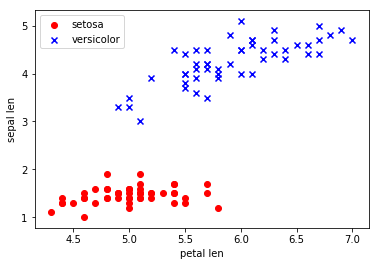

In [10]:
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('petal len')
plt.ylabel('sepal len')
plt.legend(loc='upper left')

In [11]:
ppn = Perceptron(learning_rate=0.1, threshold=0, n_iter=10)

In [12]:
ppn.fit(X, y)

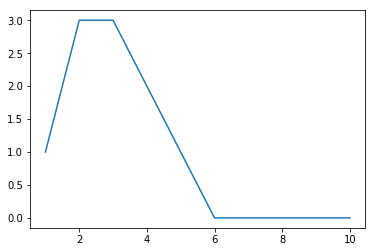

In [13]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)

In [14]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

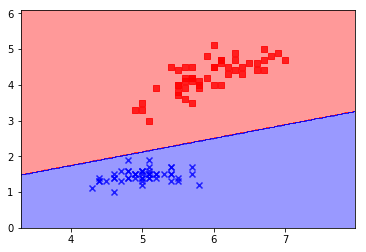

In [15]:
plot_decision_regions(X, y, classifier=ppn)